# Experiencia 2

### Integrantes: Vanessa González, Manuel Zamorano


In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

!unrar x  '/content/drive/MyDrive/Lab_2_Cells_2.rar'

Mounted at /content/drive

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/drive/MyDrive/Lab_2_Cells_2.rar

Creating    Lab_2_Cells_2                                             OK
Creating    Lab_2_Cells_2/cell_gal                                    OK
Extracting  Lab_2_Cells_2/cell_gal/I1_gal.jpg                              6%  OK 
Extracting  Lab_2_Cells_2/cell_gal/I2_gal.jpg                             14%  OK 
Extracting  Lab_2_Cells_2/cell_gal/I3_gal.jpg                             17%  OK 
Extracting  Lab_2_Cells_2/cell_gal/I4_gal.jpg                             23%  OK 
Extracting  Lab_2_Cells_2/cell_gal/I5_gal.jpg                             28%  OK 
Extracting  Lab_2_Cells_2/cell_gal/I6_gal.jpg                             34%  OK 
Extracting  Lab_2_Cells_2/cell_gal/I7_gal.jpg                             41%  OK 
Extracting  Lab_2_Cells_2/cell_gal/I8_gal.jpg     

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from matplotlib.colors import hsv_to_rgb
from matplotlib.colors import rgb_to_hsv

### 1) Implemente el algoritmo de análisis de textura LBP usando una matriz de 3x3. Aplique LBP a todas las imágenes de células sanguíneas disponibles y guarde los resultados. ¿Qué características tienen las imágenes procesadas con LBP?

In [ ]:
# descomprimimos las imágenes de ojos_gal, les hacemos un rezise a 500x500 y las pasamos a escala de grises
i1_gal = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_gal/I1_gal.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i2_gal = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_gal/I2_gal.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i3_gal = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_gal/I3_gal.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i4_gal = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_gal/I4_gal.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i5_gal = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_gal/I5_gal.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i6_gal = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_gal/I6_gal.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i7_gal = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_gal/I7_gal.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i8_gal = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_gal/I8_gal.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)

In [ ]:
# función para calcular el valor del píxel resultante con una matriz de 9x9, se evalúan los 8 píxeles que rodean al píxel central
def lbp(matriz):
  m = np.reshape(matriz, (1, 9))   # vector con los valores de la matriz de 3x3
  v = []                           # vector con los 1s y 0s (código binario)
  c = m[0][4]                      # valor central de la matriz
  for i in range(0, len(m[0])):
    if i != 4:
      if m[0][i] >= c:
        v.append(1)
      else:
        v.append(0)
  v = np.array(v)
  multi = np.array([128, 64, 32, 1, 16, 2, 4, 8])
  return (v*multi).sum()

In [ ]:
# aplica LBP a una imagen
def lbp2(img):
  x = img.shape[1]                              # ancho, nº de columnas
  y = img.shape[0]                              # alto, nº de filas
  img_lbp = np.zeros((y - 2, x - 2))            # tiene y-2 filas y x-2 columnas, se pierden los bordes
  for i in range(0, y - 2):                     # recorremos de arriba hacia abajo
    for j in range(0, x - 2):                   # recorremos de izquierda a derecha
      # las filas están fijas con i
      matriz3x3 = img[i:i+3, j:j+3]
      valor = lbp(matriz3x3)
      img_lbp[i, j] = valor
  return img_lbp

In [ ]:
# aplicamos lbp a las imágenes de cells_gal
i1_gal_lbp = lbp2(i1_gal)
i2_gal_lbp = lbp2(i2_gal)
i3_gal_lbp = lbp2(i3_gal)
i4_gal_lbp = lbp2(i4_gal)
i5_gal_lbp = lbp2(i5_gal)
i6_gal_lbp = lbp2(i6_gal)
i7_gal_lbp = lbp2(i7_gal)
i8_gal_lbp = lbp2(i8_gal)

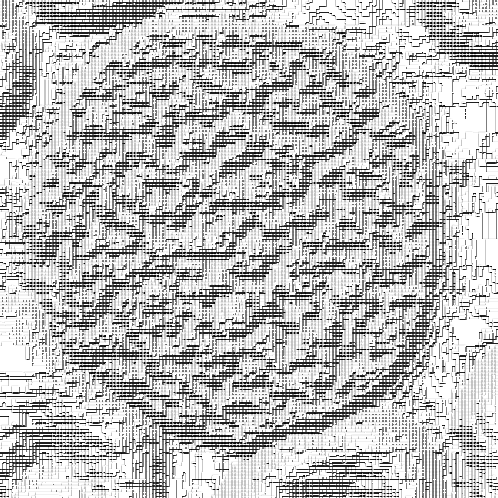

In [ ]:
cv2_imshow(i1_gal_lbp)

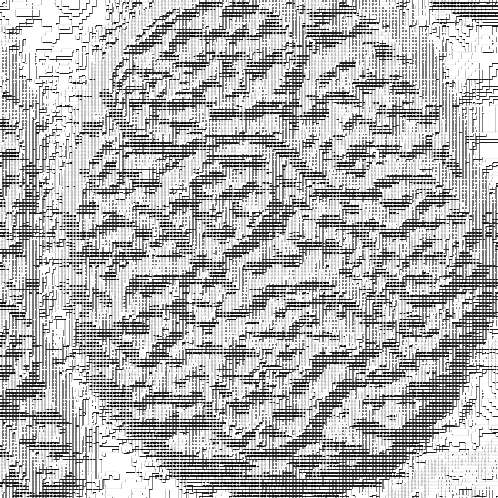

In [ ]:
cv2_imshow(i2_gal_lbp)

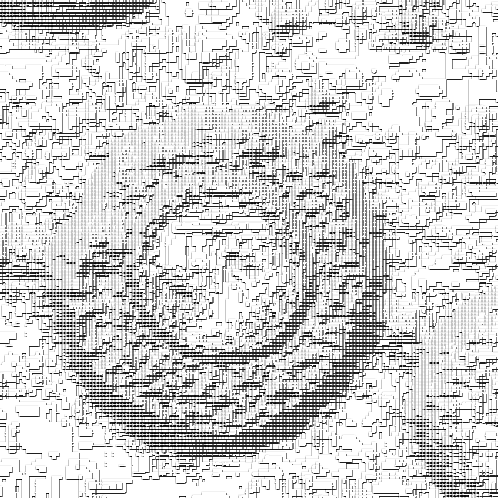

In [ ]:
cv2_imshow(i3_gal_lbp)

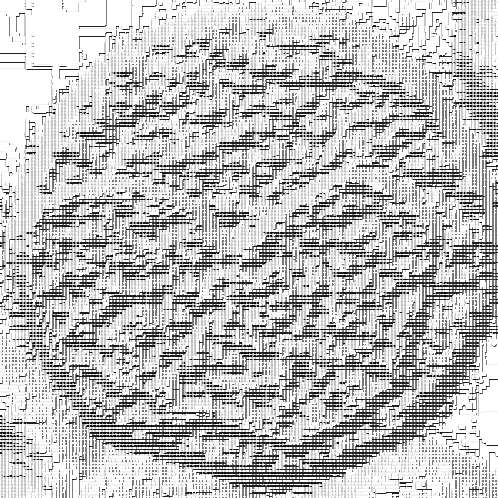

In [ ]:
cv2_imshow(i4_gal_lbp)

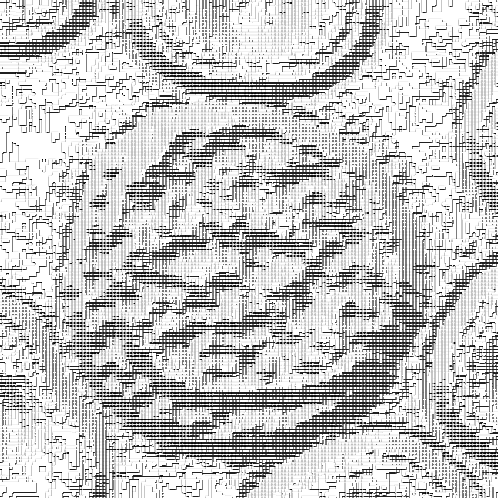

In [ ]:
cv2_imshow(i5_gal_lbp)

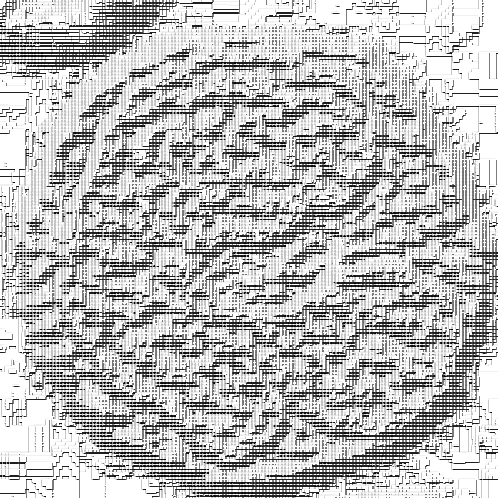

In [ ]:
cv2_imshow(i6_gal_lbp)

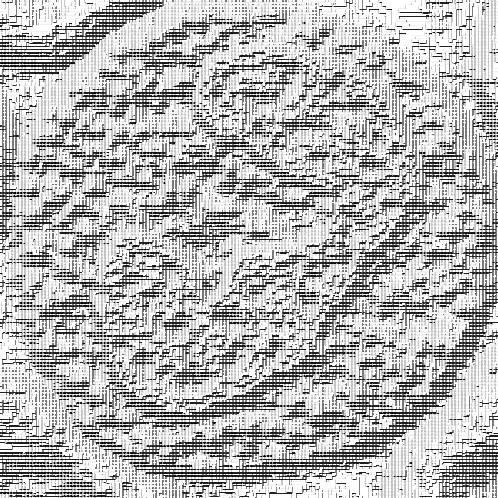

In [ ]:
cv2_imshow(i7_gal_lbp)

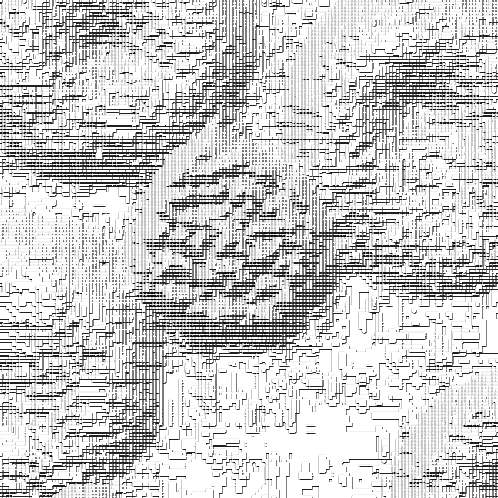

In [ ]:
cv2_imshow(i8_gal_lbp)

### 2) Desarrolle un algoritmo para extraer un vector de características para cada imagen. Para ello divida la imagen de entrada en 25 regiones de 100x100 pixeles (ancho x alto) y a cada una de ellas calcúlele un histograma cuantizado en 84 puntos. Concatene los 25 histogramas conseguidos en un vector de dimensiones 1x2100 que será el elemento de salida al método de extracción de características. 

In [ ]:
# función para extraer el vector de características
# las imágenes son de 500x500 y tienen niveles que van del 0 al 255
def vector_caract(img):
  # dividimos la imagen en 25 regiones de 100x100
  vector = []
  for i in range(0, 401, 100):          # recorremos las filas
    for j in range(0, 401, 100):        # recorremos las columnas
      # las columnas indexadas están fijas con i
      region = img[i:i+100, j:j+100]
      # calculamos el histograma cuantizado, tiene 84 bins equiespaciados que abarcan desde 0 a 255
      hist = np.histogram(region, bins = 84, range = [0.0, 255.0])
      valores = hist[0].tolist()
      vector += valores
  return np.array(vector)

### 3) Implemente la siguiente medida de distancia entre dos vectores de largo n:
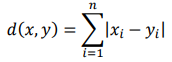

In [ ]:
# función para calcular la ditancia entre 2 vectores a y b de largo n
def distancia(a, b):
  n = len(a)   # largo vectores
  suma = 0
  for i in range(0, n):
    suma += np.abs(a[i] - b[i])
  return suma

In [ ]:
# prueba
distancia(np.array([1, 2, 3]), np.array([1, 4, 6]))

5

### 4) Construya una base de datos usando las imágenes del archivo cell_gal.zip. Esto incluye procesar las imágenes usando LBP, la posterior extracción y almacenamiento del vector de características para cada una de ellas. 

In [ ]:
# aplicamos lbp a las imágenes de cells_gal
i1_gal_lbp = lbp2(i1_gal)
i2_gal_lbp = lbp2(i2_gal)
i3_gal_lbp = lbp2(i3_gal)
i4_gal_lbp = lbp2(i4_gal)
i5_gal_lbp = lbp2(i5_gal)
i6_gal_lbp = lbp2(i6_gal)
i7_gal_lbp = lbp2(i7_gal)
i8_gal_lbp = lbp2(i8_gal)

In [ ]:
# extracción de características
i1_gal_caract = vector_caract(i1_gal_lbp)
i2_gal_caract = vector_caract(i2_gal_lbp)
i3_gal_caract = vector_caract(i3_gal_lbp)
i4_gal_caract = vector_caract(i4_gal_lbp)
i5_gal_caract = vector_caract(i5_gal_lbp)
i6_gal_caract = vector_caract(i6_gal_lbp)
i7_gal_caract = vector_caract(i7_gal_lbp)
i8_gal_caract = vector_caract(i8_gal_lbp)

In [ ]:
# construcción de la base de datos
# las columnas son 2100 características
import pandas as pd
base_cells_gal = pd.DataFrame(columns = range(1, 2101))
# agregamos las filas con las características de cada imagen de ceels_gal
base_cells_gal.loc['i1_gal'] = i1_gal_caract.tolist()
base_cells_gal.loc['i2_gal'] = i2_gal_caract.tolist()
base_cells_gal.loc['i3_gal'] = i3_gal_caract.tolist()
base_cells_gal.loc['i4_gal'] = i4_gal_caract.tolist()
base_cells_gal.loc['i5_gal'] = i5_gal_caract.tolist()
base_cells_gal.loc['i6_gal'] = i6_gal_caract.tolist()
base_cells_gal.loc['i7_gal'] = i7_gal_caract.tolist()
base_cells_gal.loc['i8_gal'] = i8_gal_caract.tolist()
# vemos la base
base_cells_gal

,1,2,3,4,5,6,7,8,9,10,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
i1_gal,0,0,219,0,85,0,0,0,0,252,...,24,1,67,0,6,537,123,55,218,4594
i2_gal,0,1,51,0,12,0,0,0,0,89,...,127,0,236,0,5,1141,165,53,94,4740
i3_gal,0,0,194,0,83,0,0,0,0,229,...,12,0,66,0,4,264,98,45,43,5049
i4_gal,0,0,12,0,0,0,0,0,0,17,...,42,1,66,0,4,1163,47,48,211,5474
i5_gal,6,8,54,0,13,35,2,2,1,352,...,18,0,41,0,2,753,47,62,214,4323
i6_gal,0,1,231,0,104,0,0,0,0,296,...,27,0,56,0,6,563,46,46,78,5709
i7_gal,0,0,232,0,86,0,0,0,0,379,...,90,0,209,0,4,524,232,40,52,4081
i8_gal,2,0,119,0,19,4,0,1,0,276,...,113,0,295,0,1,800,324,45,68,4507


### 5) Realice una prueba de reconocimiento de cada imagen del archivo cell_test.zip. Para ello debe procesar cada imagen mediante LBP, extraer el vector de características y compararlo con cada uno de los almacenados en la base de datos usando como medida de similitud la distancia programada. ¿Cuántos reconocimientos correctos se obtienen? 

In [ ]:
# descomprimimos las imágenes de cell_test y las pasamos a escala de grises
i1_test = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_test/I1_test.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i2_test = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_test/I2_test.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i3_test = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_test/I3_test.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i4_test = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_test/I4_test.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i5_test = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_test/I5_test.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i6_test = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_test/I6_test.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i7_test = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_test/I7_test.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
i8_test = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_test/I8_test.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)

In [ ]:
# aplicamos lbp a las imágenes de cell_test
i1_test_lbp = lbp2(i1_test)
i2_test_lbp = lbp2(i2_test)
i3_test_lbp = lbp2(i3_test)
i4_test_lbp = lbp2(i4_test)
i5_test_lbp = lbp2(i5_test)
i6_test_lbp = lbp2(i6_test)
i7_test_lbp = lbp2(i7_test)
i8_test_lbp = lbp2(i8_test)

In [ ]:
# extracción de características
i1_test_caract = vector_caract(i1_test_lbp)
i2_test_caract = vector_caract(i2_test_lbp)
i3_test_caract = vector_caract(i3_test_lbp)
i4_test_caract = vector_caract(i4_test_lbp)
i5_test_caract = vector_caract(i5_test_lbp)
i6_test_caract = vector_caract(i6_test_lbp)
i7_test_caract = vector_caract(i7_test_lbp)
i8_test_caract = vector_caract(i8_test_lbp)

In [ ]:
# función para comparar el vector de características con los de la base de datos usando como medida de similitud la distancia programada
def comparacion(vector):
  distancias = []
  for i in range(0, 8):   # para cada fila de la base de datos
    fila = np.array(base_cells_gal.iloc[i])
    dist = distancia(vector, fila)
    distancias.append(dist)
    print('Distancia con i' + str(i + 1) + '_gal: ' + str(dist))
  print('')
  # buscamos la menor distancia
  indice_minimo = distancias.index(min(distancias))
  print('Menor distancia encontrada con: i' + str(indice_minimo + 1) + '_gal')

In [ ]:
# reconocimiento de i1
comparacion(i1_test_caract)

Distancia con i1_gal: 49250
Distancia con i2_gal: 53276
Distancia con i3_gal: 122344
Distancia con i4_gal: 56260
Distancia con i5_gal: 85010
Distancia con i6_gal: 61042
Distancia con i7_gal: 49952
Distancia con i8_gal: 123944

Menor distancia encontrada con: i1_gal


In [ ]:
# reconocimiento de i2
comparacion(i2_test_caract)

Distancia con i1_gal: 60556
Distancia con i2_gal: 22460
Distancia con i3_gal: 130096
Distancia con i4_gal: 46590
Distancia con i5_gal: 85692
Distancia con i6_gal: 52446
Distancia con i7_gal: 50534
Distancia con i8_gal: 131728

Menor distancia encontrada con: i2_gal


In [ ]:
# reconocimiento de i3
comparacion(i3_test_caract)

Distancia con i1_gal: 139462
Distancia con i2_gal: 162618
Distancia con i3_gal: 68248
Distancia con i4_gal: 152456
Distancia con i5_gal: 101706
Distancia con i6_gal: 138312
Distancia con i7_gal: 160526
Distancia con i8_gal: 118724

Menor distancia encontrada con: i3_gal


In [ ]:
# reconocimiento de i4
comparacion(i4_test_caract)

Distancia con i1_gal: 63980
Distancia con i2_gal: 67576
Distancia con i3_gal: 96918
Distancia con i4_gal: 60874
Distancia con i5_gal: 69478
Distancia con i6_gal: 63556
Distancia con i7_gal: 72882
Distancia con i8_gal: 116216

Menor distancia encontrada con: i4_gal


In [ ]:
# reconocimiento de i5
comparacion(i5_test_caract)

Distancia con i1_gal: 86060
Distancia con i2_gal: 98034
Distancia con i3_gal: 78634
Distancia con i4_gal: 85076
Distancia con i5_gal: 65236
Distancia con i6_gal: 90330
Distancia con i7_gal: 103418
Distancia con i8_gal: 107512

Menor distancia encontrada con: i5_gal


In [ ]:
# reconocimiento de i6
comparacion(i6_test_caract)

Distancia con i1_gal: 52318
Distancia con i2_gal: 49116
Distancia con i3_gal: 125414
Distancia con i4_gal: 57046
Distancia con i5_gal: 83362
Distancia con i6_gal: 43982
Distancia con i7_gal: 45964
Distancia con i8_gal: 131968

Menor distancia encontrada con: i6_gal


In [ ]:
# reconocimiento de i7
comparacion(i7_test_caract)

Distancia con i1_gal: 57574
Distancia con i2_gal: 50048
Distancia con i3_gal: 115786
Distancia con i4_gal: 56118
Distancia con i5_gal: 78908
Distancia con i6_gal: 48306
Distancia con i7_gal: 47006
Distancia con i8_gal: 124420

Menor distancia encontrada con: i7_gal


In [ ]:
# reconocimiento de i8
comparacion(i8_test_caract)

Distancia con i1_gal: 135630
Distancia con i2_gal: 149122
Distancia con i3_gal: 112294
Distancia con i4_gal: 149520
Distancia con i5_gal: 116318
Distancia con i6_gal: 151954
Distancia con i7_gal: 158444
Distancia con i8_gal: 109966

Menor distancia encontrada con: i8_gal


Todas las células contenidas en cell_test son reconocidas correctamente.

### 6) . ¿Qué pasaría si se tiene como entrada al sistema una imagen de célula sanguínea que no está en la base de datos? ¿Qué estrategia implementaría para enfrentar dicho problema? Pruebe su estrategia usando las imágenes del archivo cell_impostor.zip. Identifique al falso impostor, es decir, a la célula que está en la carpeta cell_impostor y en la carpeta cell_gal, explique el criterio utilizado para detectarlo. 

In [ ]:
# La mayor distancia de reconocimiento es 109.966 y la menor es 22.460.
# Se podría limitar a un valor de distancia la búsqueda.
# Es decir, establecer un máximo de distancia para decidir que dos imagenes son compatibles.
# Por ejemplo, si es que la menor distancia es mayor a 100.000, entonces es un impostor y no está registrado.


# descomprimimos las imágenes de ojos_impostor y las pasamos a escala de grises + resize
imp_0001 = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_impostor/imp_0001.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
imp_0002 = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_impostor/imp_0002.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)
imp_0003 = cv.cvtColor(cv.resize(cv.imread('/content/Lab_2_Cells_2/cell_impostor/imp_0003.jpg'), (500, 500), interpolation=cv.INTER_AREA), cv.COLOR_BGR2GRAY)

In [ ]:
# aplicamos lbp a las imágenes de ojos_impostor
imp__0001_lbp = lbp2(imp_0001)
imp__0002_lbp = lbp2(imp_0002)
imp__0003_lbp = lbp2(imp_0003)

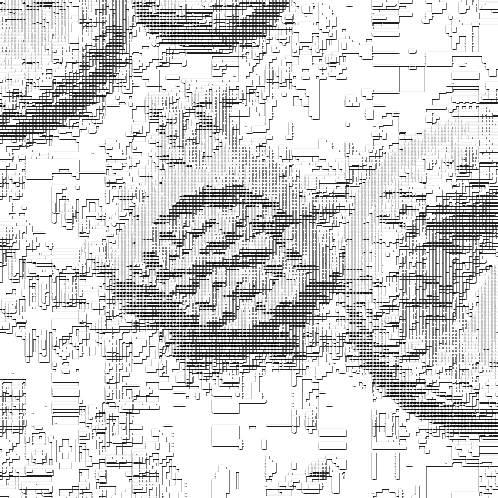

In [ ]:
cv2_imshow(imp__0001_lbp)

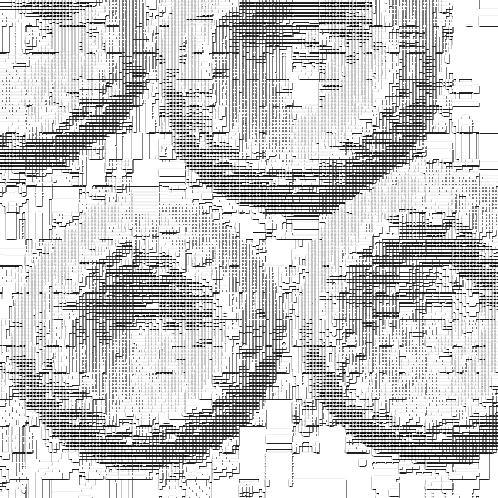

In [ ]:
cv2_imshow(imp__0002_lbp)

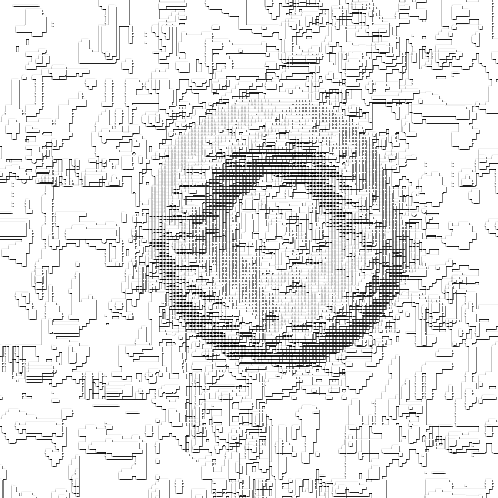

In [ ]:
cv2_imshow(imp__0003_lbp)

In [ ]:
# extracción de características
imp_0001_caract = vector_caract(imp__0001_lbp)
imp_0002_caract = vector_caract(imp__0002_lbp)
imp_0003_caract = vector_caract(imp__0003_lbp)

In [ ]:
# editamos un poco la función de comparación para que sólo nos entregue la minima distancia.
def comparacion2(vector):
  distancias = []
  for i in range(0, 8):   # para cada fila de la base de datos
    fila = np.array(base_cells_gal.iloc[i])
    dist = distancia(vector, fila)
    distancias.append(dist)
  # buscamos la menor distancia
  distancia_minima = min(distancias)
  return distancia_minima

In [ ]:
# creamos una función que reciba el vector del impostor
# busca si pertenece a la base de datos test, utilizando el límite propuesto
def impostor(vector):
  dist_min = comparacion2(vector)
  if dist_min >= 93000:
    print('Impostor encontrado')
  else: 
    comparacion(vector)

In [ ]:
impostor(imp_0001_caract)

Distancia con i1_gal: 136438
Distancia con i2_gal: 157128
Distancia con i3_gal: 95156
Distancia con i4_gal: 154060
Distancia con i5_gal: 109680
Distancia con i6_gal: 135434
Distancia con i7_gal: 153450
Distancia con i8_gal: 91300

Menor distancia encontrada con: i8_gal


In [ ]:
impostor(imp_0002_caract)

Impostor encontrado


In [ ]:
impostor(imp_0003_caract)

Impostor encontrado


In [ ]:
# veamos el valor más cercano del impostor 2
comparacion(imp_0002_caract)

Distancia con i1_gal: 113146
Distancia con i2_gal: 126708
Distancia con i3_gal: 94016
Distancia con i4_gal: 126696
Distancia con i5_gal: 101562
Distancia con i6_gal: 112940
Distancia con i7_gal: 122724
Distancia con i8_gal: 96350

Menor distancia encontrada con: i3_gal


In [ ]:
# veamos el valor más cercano del impostor 3
comparacion(imp_0003_caract)

Distancia con i1_gal: 177358
Distancia con i2_gal: 195372
Distancia con i3_gal: 101608
Distancia con i4_gal: 179764
Distancia con i5_gal: 141848
Distancia con i6_gal: 176984
Distancia con i7_gal: 200814
Distancia con i8_gal: 121842

Menor distancia encontrada con: i3_gal
